## Instructions
* Read each cell and implement the **TODOs** sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Do not delete the **TODO** comment blocks.
* Aside from the TODOs, there will be questions embedded in the notebook and a cell for you to provide your answer (denoted with A:). Answer all the markdown/text cells with **"A: "** on them. 
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

Place your answers to the questions directly inline on the same cell as **A:**

For example:

<span style='color:red'>**Question 00:**</span> What is your favorite ice cream flavor?

<span style='color:red'>**A00:**</span> My favorite flavor ice cream flavor is pistachio.

# Assignment 1.4 - Knowledge Based AI Notebook 
In this notebook, you will be experimenting on Bayesian networks on the Dutch census dataset and implementing a simple sudoku solver using logic rules.

# Bayesian Networks

For this case study, we are going to look at Bayesian networks. 
A Bayesian network is a directed acyclic graph that represent the dependency structure of a set of variables. 
We can use this model to see how changes in one variable affect one another and perform inference queries.

In [ ]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import scipy.stats
from sklearn import preprocessing

Let's start first with loading the dataset that we are gonna be using.

### The Dutch Virtual Census of 2001 dataset
https://microdata.worldbank.org/index.php/catalog/2102/study-description

The dataset includes 60,420 samples where each sample is described by 12 variables. The table below shows an overview of the variables.
Note that this dataset is a pre-processed version of the original where the range of values have already been discretized (converted to a small set of categories) for simplicity.

| Attributes           | Type        | Values                         | Description                                                    |
| -------------------- | ----------- | ------------------------------ | -------------------------------------------------------------- |
| sex                  | Binary      | {0: Female, 1: Male}                  | The biological sex of the person                               |
| age                  | Categorical | 12                             | The age group of the person (0–4, 5–9, etc.)                   |
| household_position   | Categorical | 8                              | The relationship to household head (spouse, child, etc.)       |
| household_size       | Categorical | 6                              | The size of the household the person belongs to                |
| prev_residence_place | Binary      | {0: non-Netherlands, 1: Netherlands} | The place of the person's residence prior to the Census        |
| citizenship          | Categorical | 3                              | The person's citizenship status                                |
| country_birth        | Categorical | 3                              | Whether the person was born in the Netherlands or elsewhere    |
| edu_level            | Categorical | 6                              | The person's level of educational attainment                   |
| economic_status      | Categorical | 3                              | The person's economic status (class of worker)                 |
| cur_eco_activity     | Categorical | 12                             | The current economic activity                                  |
| marital_status       | Categorical | 4                              | The person's current marital status according to law or custom |
| occupation           | Binary      | {0: low-level, 1: high-level}                          |  The person's occupation (0: low-level, 1: high-level)         |

In [48]:
df = pd.read_csv("dutch_preprocessed.csv")
df.head()

,sex,age,household_position,household_size,prev_residence_place,citizenship,country_birth,edu_level,economic_status,cur_eco_activity,marital_status,occupation
0,1,6,3,1,1,1,1,5,0,7,1,1
1,0,10,2,2,1,1,1,2,0,1,2,0
2,1,8,2,2,1,1,1,2,0,1,2,1
3,1,12,1,1,1,1,1,1,0,9,2,0
4,0,4,0,3,1,1,1,2,0,10,1,0


## Defining graph structure

One way to incorporate domain knowledge is by defining structure of this dependency graph.
The structure of the graph would impose certain constraints and determine how the different variables affect one another.

Since we do not know the dependency graph for this dataset, we can try to first infer it from data.

<span style='color:red'>**TODO-01:**</span> The pyAgrum library has a tutorial below on how to learn the structure from data. Follow this tutorial and learn a plausible structure for this dutch census dataset.

https://pyagrum.readthedocs.io/en/1.15.1/notebooks/31-Learning_structuralLearning.html

Don't forget to visualize the graph. You can add as many cells below as necessary.

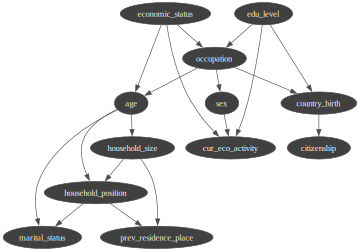

In [49]:
# Load your dataset
data = pd.read_csv('dutch_preprocessed.csv')

# If the data is already preprocessed, you can skip this step
# Preprocess your data (example: encoding categorical variables)
# data_encoded = pd.get_dummies(data) # Uncomment if preprocessing is needed

# Learn the structure of your data
learner = gum.BNLearner(data)
bn = learner.learnBN()

# Visualize the resulting graph
gnb.showBN(bn)

<span style='color:red'>**Question 01:**</span> Do the relationships learned only from the data make sense? Why or why not? Explain your answer.

<span style='color:red'>**A01:**</span>

<span style='color:red'>**Question 02:**</span> If you were going to modify certain relationships, which ones would you change? How will your graph look like?


<span style='color:red'>**A02:**</span>

<span style='color:red'>**TODO-02:**</span> Incorporate the modifications to the graph to align with your domain knowledge.

You can incorporate this in the graph learning by adding mandatory arcs.

For example, "I know that smoking causes cancer"

``learner.addMandatoryArc("smoking","lung_cancer") # smoking->lung_cancer``

Ofcourse there's its opposite where you add forbidden arcs. `learner.addForbiddenArc()`

You can optionally define the entire graph yourself using `addArc` function.

Don't forget to visualize the graph. You can add as many cells below as necessary.

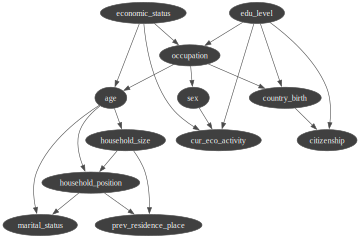

In [50]:
# Add new arcs to mediate relationships
# bn.addArc("age", "education_level")
bn.addArc("edu_level", "citizenship")

# # Ensure the desired arc doesn't already exist before adding
# if not bn.hasArc("age", "economic_status"):
#     bn.addArc("age", "education_level")
#     bn.addArc("education_level", "economic_status")


# Visualize the updated graph
# # Visualize the modified graph
gnb.showBN(bn)




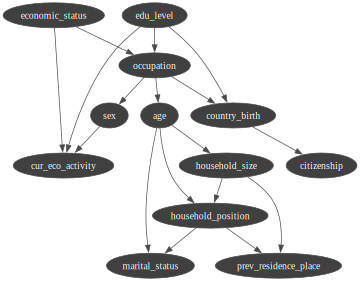

In [51]:
bn.eraseArc("edu_level", "citizenship")
bn.eraseArc("economic_status", "age")
# # Visualize the modified graph
gnb.showBN(bn)


## Learning the parameters
Now that you have defined a graph, we need to learn the parameters. In this case, these parameters would correspond to the conditional probabilities for each node given its parents.

<span style='color:red'>**TODO-03:**</span> Follow the tutorial on learning parameters from a database (in this case a csv file) and learn the parameters for the dutch census dataset.
                                                                                                                       
https://pyagrum.readthedocs.io/en/1.15.1/notebooks/31-Learning_structuralLearning.html#Parameters-learning-from-the-database

Visualize some of the learned conditional probability tables (cpt). (Minimum of 2)

## Inference queries

Now that we have a learned model, we can answer inference queries.
Look at the tutorial on causality and counterfactuals from pyAgrum to get an idea on how this is done. 

https://pyagrum.readthedocs.io/en/1.15.1/notebooks/65-Causality_Counterfactual.html

<span style='color:red'>**TODO-04:**</span> Perform some counterfactual inference queries using the learned model above. Show and interpret at least two examples. You are free to choose which variables you want to investigate. 

<span style='color:red'>**Question 03:**</span> Using the observations from the results of the previous cells, can you explain why standard deep learning models are not suitable for counterfactual reasoning?

<span style='color:red'>**A03:**</span>

# Solving Sudoku by specifying logic rules

For this we will be using the z3-solver, which you can install using the command below.

``pip install z3-solver``

https://z3prover.github.io/papers/programmingz3.html#sec-terms-and-formulas

### Background brief tutorial with z3 solver

In [52]:
import matplotlib as mpl
import numpy as np
from z3 import *

To use the z3 solver, we need to first instantiate a solver instance.

In [53]:
solver = Solver()

Next, the only thing we need to do is to add the logical rules that would serve as the constraints in searching for a solution. z3 solver will handle the rest.

To do this, we need to first define our atoms. For our case, we would only be dealing with integer atoms and you can define them as follows.

In [54]:
A = Int("A")
B = Int("B")

You can add rules using the `solver.add()` function. You can pass in expressions as a parameter.

In [55]:
solver.add(A > 0)

You could also use `And()` `Or()` operators. By default, all the rules you add are combined by `And`.

In [56]:
solver.add(Or(B < 0, B > 5))

You can also use arithmetic operations.

In [57]:
solver.add(A + B == 2)

As well as `Distinct()` function.

In [58]:
solver.add(Distinct(A,B))

In [59]:
print(solver.check() == sat) # sat is a special variable which the solver will return if the constraints are satisfiable 
print(solver.model()) # we can get a solution through the solver.model()

True
[B = -1, A = 3]


## Sudoku solver

Now we are ready to work on the sudoku solver.

In [60]:
rows = 'ABCDEFGHI'
cols = '123456789'
sudoku_boxes = np.array([[Int("{}{}".format(r, c)) for c in cols] for r in rows])

In this case, the atoms are in the matrix `sudoku_boxes`. Note that it is currently in a numpy array for easy indexing. However, you will need to convert it to lists later on since some of the functions would expect an ordinary python list, which you can easily do by using the `.tolist()` function.

In [61]:
sudoku_boxes

array([[A1, A2, A3, A4, A5, A6, A7, A8, A9],
       [B1, B2, B3, B4, B5, B6, B7, B8, B9],
       [C1, C2, C3, C4, C5, C6, C7, C8, C9],
       [D1, D2, D3, D4, D5, D6, D7, D8, D9],
       [E1, E2, E3, E4, E5, E6, E7, E8, E9],
       [F1, F2, F3, F4, F5, F6, F7, F8, F9],
       [G1, G2, G3, G4, G5, G6, G7, G8, G9],
       [H1, H2, H3, H4, H5, H6, H7, H8, H9],
       [I1, I2, I3, I4, I5, I6, I7, I8, I9]], dtype=object)

In [62]:
sudoku_boxes.tolist()

[[A1, A2, A3, A4, A5, A6, A7, A8, A9],
 [B1, B2, B3, B4, B5, B6, B7, B8, B9],
 [C1, C2, C3, C4, C5, C6, C7, C8, C9],
 [D1, D2, D3, D4, D5, D6, D7, D8, D9],
 [E1, E2, E3, E4, E5, E6, E7, E8, E9],
 [F1, F2, F3, F4, F5, F6, F7, F8, F9],
 [G1, G2, G3, G4, G5, G6, G7, G8, G9],
 [H1, H2, H3, H4, H5, H6, H7, H8, H9],
 [I1, I2, I3, I4, I5, I6, I7, I8, I9]]

Another useful function is the `chain` function from `itertools` library which flatten nested lists; `chain(*[[a, b], [c, d], ...]) == [a, b, c, d, ...]`

In [63]:
from itertools import chain
print(list(chain(*sudoku_boxes)))

[A1, A2, A3, A4, A5, A6, A7, A8, A9, B1, B2, B3, B4, B5, B6, B7, B8, B9, C1, C2, C3, C4, C5, C6, C7, C8, C9, D1, D2, D3, D4, D5, D6, D7, D8, D9, E1, E2, E3, E4, E5, E6, E7, E8, E9, F1, F2, F3, F4, F5, F6, F7, F8, F9, G1, G2, G3, G4, G5, G6, G7, G8, G9, H1, H2, H3, H4, H5, H6, H7, H8, H9, I1, I2, I3, I4, I5, I6, I7, I8, I9]


Another useful trick is the `*` operator in python. Particularly, it allows you to unpack a list and individually pass it as a parameter.

For example,

`letters = ["a", "b", "c", "d"]`

`print(*letters)` is equivalent to `print("a","b","c","d")`



In [64]:
letters = ["a", "b", "c", "d"]
print(letters)

['a', 'b', 'c', 'd']


In [65]:
print(*letters)

a b c d


In [66]:
print("a","b","c","d")

a b c d


Let's instantiate the sudoku solver!

In [67]:
sudoku_solver = Solver()

In [68]:
###############################################################
# TODO-05: Add the constraint that dictates the range of      #
# values that each atom (each cell) in the sudoku can         #
# have.                                                       #
###############################################################

for r in rows:
    for c in cols:
        sudoku_solver.add(And(sudoku_boxes[ord(r) - ord('A')][int(c) - 1] >= 1,
                sudoku_boxes[ord(r) - ord('A')][int(c) - 1] <= 9))

###############################################################
#                    End of your code.                        #
###############################################################

In [69]:
###############################################################
# TODO-06: Add the constraint that each row has a distinct    #
# value.                                                      #
###############################################################
# Adding the constraint that each row has distinct values
for r in rows:
    sudoku_solver.add(Distinct([sudoku_boxes[ord(r) - ord('A')][int(c) - 1] for c in cols]))

###############################################################
#                    End of your code.                        #
###############################################################

In [70]:
###############################################################
# TODO-07: Add the constraint that each column has a distinct #
# value.                                                      #
###############################################################
# Adding the constraint that each column has distinct values
for c in cols:
    sudoku_solver.add(Distinct([sudoku_boxes[ord(r) - ord('A')][int(c) - 1] for r in rows]))


###############################################################
#                    End of your code.                        #
###############################################################

In [71]:
###############################################################
# TODO-08: Add the constraint that each 3x3 block has a       #
# distinct value.                                             #
###############################################################
for i in range(3):
    for j in range(3):
        block = [sudoku_boxes[3*i + k][3*j + l] for k in range(3) for l in range(3)]
        sudoku_solver.add(Distinct(block))


###############################################################
#                    End of your code.                        #
###############################################################

Now that we have encoded the general rules of sudoku, we need to account for the particular constraints in an instance of a sudoku puzzle. Particularly, the constraints that certain boxes already have a pre-determined value as specified by the instance of the sudoku puzzle.

We define below an instance of a sudoku board configuration. The 0 value indicates that the box does not have an assigned value and it will have to be determined by the solver.

In [72]:
board = ((0,0,0,2,0,7,1,3,0),
        (5,4,0,0,6,0,0,8,0),
        (0,1,0,9,0,0,0,5,2),
        (9,5,0,0,8,2,0,0,6),
        (0,0,6,0,0,0,7,0,0),
        (3,0,0,5,9,0,0,4,8),
        (8,2,0,0,0,4,0,7,0),
        (0,3,0,0,2,0,0,6,9),
        (0,6,5,1,0,9,0,0,0))


In [73]:
###############################################################
# TODO-09: Add the constraint specifying the given values of  #
# the boxes as determined by the given sudoku board           #
# configuration.                                              #
###############################################################
given_values = {
    "A1": 5, "A2": 3, "A5": 7,
    "B1": 6, "B4": 1, "B5": 9, "B6": 5,
    "C2": 9, "C3": 8, "C8": 6,
    "D1": 8, "D5": 6, "D9": 3,
    "E1": 4, "E4": 8, "E6": 3, "E9": 1,
    "F1": 7, "F5": 2, "F9": 6,
    "G2": 6, "G7": 2, "G8": 8,
    "H4": 4, "H5": 1, "H6": 9, "H9": 5,
    "I5": 8, "I8": 7, "I9": 9
}

# Adding the given values as constraints
for key, value in given_values.items():
    sudoku_solver.add(sudoku_boxes[ord(key[0]) - ord('A')][int(key[1]) - 1] == value)


###############################################################
#                    End of your code.                        #
###############################################################

The code below checks for the satisfiability and displays the found solution.

In [74]:
assert sudoku_solver.check() == sat, "The solver didn't find a solution. Double check your constraints."
for row, _boxes in enumerate(sudoku_boxes):
    if row and row % 3 == 0:
        print('-'*9+"|"+'-'*9+"|"+'-'*9)
    for col, box in enumerate(_boxes):
        if col and col % 3 == 0:
            print('|', end='')
        print(' {} '.format(sudoku_solver.model()[box]), end='')
    print()

 5  3  4 | 6  7  8 | 9  1  2 
 6  7  2 | 1  9  5 | 3  4  8 
 1  9  8 | 3  4  2 | 5  6  7 
---------|---------|---------
 8  5  9 | 7  6  1 | 4  2  3 
 4  2  6 | 8  5  3 | 7  9  1 
 7  1  3 | 9  2  4 | 8  5  6 
---------|---------|---------
 9  6  1 | 5  3  7 | 2  8  4 
 2  8  7 | 4  1  9 | 6  3  5 
 3  4  5 | 2  8  6 | 1  7  9 


<span style='color:red'>**Question 04:**</span> Discuss the advantages and disadvantages of this approach as compared with a machine learning sudoku solver in terms of scalability on space and time complexity as well as accuracy of the solutions.

<span style='color:red'>**A04:**</span> Constraint Solver (Z3)
Advantages:

Accuracy:

A constraint solver like Z3 guarantees accurate and optimal solutions for sudoku puzzles by systematically exploring all possibilities and applying logical rules. If a solution exists, Z3 will find it.

Deterministic:

The approach is deterministic, meaning that the same input will always produce the same output. There is no randomness in the solution process.

Simplicity:

Formulating sudoku constraints in Z3 is straightforward and intuitive. The rules of the game (distinct values in rows, columns, and blocks) directly map to logical constraints.

Disadvantages:

Scalability:

Constraint solvers might struggle with very large or complex problems due to the exponential growth in the search space. For standard 9x9 sudoku, this isn't an issue, but larger puzzles could pose challenges.

Space Complexity:

The memory usage of constraint solvers can be high, especially for large problems with many variables and constraints. All possibilities need to be tracked, which can consume significant memory.

Time Complexity:

Solving constraint satisfaction problems can be time-consuming, especially for larger or more complex problems. The solver needs to explore a potentially vast search space, which can lead to long computation times.

Machine Learning Sudoku Solver
Advantages:

Scalability:

ML models, especially neural networks, can be trained on large datasets and can potentially handle large or complex puzzles efficiently once trained. They can generalize patterns learned from training data.

Speed:

Once an ML model is trained, it can make predictions (solve puzzles) very quickly. This makes it suitable for real-time applications or solving a large number of puzzles in a short time.

Adaptability:

ML models can be trained on various types of puzzles, including those with different rules or constraints, by simply providing appropriate training data. They can adapt to new patterns and variations.

Disadvantages:

Accuracy:

ML models might not guarantee optimal or even correct solutions for all puzzles. They are probabilistic and depend on the quality and diversity of the training data. Some puzzles might not be solved accurately.

Training Time:

Training an ML model can be time-consuming and computationally expensive. It requires a significant amount of data and computational resources to achieve good performance.

Complexity:

Developing and training an ML model requires expertise in machine learning and access to appropriate tools and frameworks. It can be more complex and time-consuming compared to formulating logical constraints.

Summary
Constraint Solvers (Z3):

Provide guaranteed accuracy and deterministic results.

Can be resource-intensive in terms of space and time for large problems.

Simple to formulate and solve small to medium-sized puzzles.

Machine Learning Solvers:

Offer high scalability and speed after training.

Accuracy depends on training data and model performance.

Require significant resources for training and may not always guarantee correct solutions.

<span style='color:red'>**Question:**</span> How much time did it take you to answer this notebook?

<span style='color:red'>**A:**</span> 1 hour